In [5]:
import pandas as pd
import xarray as xr
import rioxarray as rxa

from pathlib import Path

import sys
sys.path.append('../../funcs/')
from xarray_tools import find_cor_ts

In [27]:
early = xr.open_dataset('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/stlake_v2.nc')['cor'].sel(time1 = slice('2021-01-01', '2021-02-01'))
late = xr.open_dataset('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/stlake_v2.nc')['cor'].sel(time1 = slice('2021-03-01', '2021-04-01'))

In [28]:
early_pol = ((early.sel(pol = 'VV') - early.sel(pol = 'VH')) / early.sel(pol = 'VV')).mean('time1').mean('time2').isel(heading = 0)
late_pol = ((late.sel(pol = 'VV') - late.sel(pol = 'VH')) / late.sel(pol = 'VV')).mean('time1').mean('time2').isel(heading = 0)

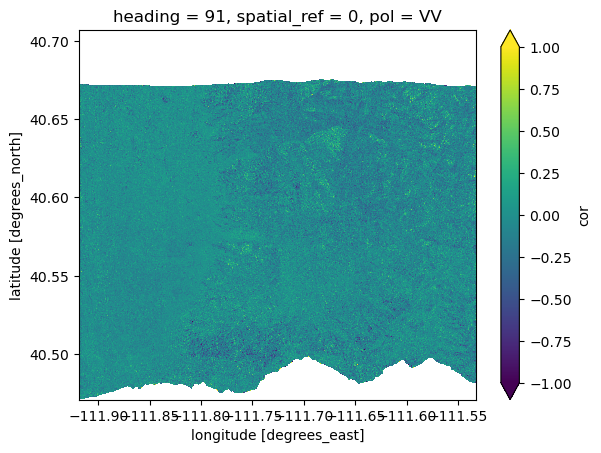

In [29]:
(late_pol - early_pol).plot(vmax = 1, vmin = -1)

In [32]:
ts = find_cor_ts(ds)

In [37]:
out_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs')
for heading, t1 , t2 in ts:
    if pd.to_datetime(t1).year != 2021: continue
    da = ds.sel(heading = heading, time1 = t1, time2 = t2, pol = ['VV', 'VH', 'HH'])['cor']
    da = (da.sel(pol = 'VV') - da.sel(pol = 'VH')) / da.sel(pol = 'VV')
    da.rio.to_raster(out_dir.joinpath(f'{pd.to_datetime(t1).date()}_{pd.to_datetime(t2).date()}.tif'))
    print(out_dir.joinpath(f'{pd.to_datetime(t1).date()}_{pd.to_datetime(t2).date()}'))

/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-01-16_2021-01-21
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-01-21_2021-01-28
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-01-28_2021-02-04
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-02-04_2021-02-11
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-02-11_2021-02-24
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-02-24_2021-03-04
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-03-04_2021-03-11
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-03-11_2021-03-17
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-03-17_2021-03-23
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-02-04_2021-02-11
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-02-11_2021-02-24
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-02-24_2021-03-04
/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar/tiffs/2021-03-

In [36]:
ds.sel(heading = heading, time1 = t1, time2 = t2, pol = ['VV', 'VH', 'HH'])['cor']

<xarray.DataArray 'cor' (pol: 3, y: 851, x: 1158)>
[2956374 values with dtype=float32]
Coordinates:
  * pol          (pol) object 'VV' 'VH' 'HH'
    time2        datetime64[ns] 2021-03-23
  * x            (x) float64 -111.9 -111.9 -111.9 ... -111.5 -111.5 -111.5
  * y            (y) float64 40.71 40.71 40.71 40.71 ... 40.47 40.47 40.47 40.47
    time1        datetime64[ns] 2021-03-17
    heading      int64 271
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area
    lat_looks:      5
    lon_looks:      6
    grid_mapping:   spatial_ref